<a href="https://colab.research.google.com/github/Dyakonov/Colab/blob/main/dj_CLINC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Эксперименты с CLINC

* использовал ... https://github.com/nlp-with-transformers/notebooks/blob/main/08_model-compression.ipynb

* UMAP https://umap-learn.readthedocs.io/
* DBSACAN https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html



* скачиваем данные (CLINC - 151 класс)
* берём какую-нибудь модель - из неё представления
* кластеризация в исходном пространстве представлений
* кластеризация в UMAP-пространстве
* перебор параметров

In [ ]:
# установка необходимых библиотек
!pip install transformers
!pip install datasets
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 28.6 MB/s 
     |████████████████████████████████| 101 kB 12.2 MB/s 
     |████████████████████████████████| 596 kB 22.0 MB/s 
     |████████████████████████████████| 6.6 MB 52.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 20.4 MB/s 
     |████████████████████████████████| 140 kB 53.6 MB/s 
     |████████████████████████████████| 212 kB 46.3 MB/s 
     |████████████████████████████████| 1.1 MB 57.2 MB/s 
     |████████████████████████████████| 127 kB 64.7 MB/s 
     |████████████████████████████████| 144 kB 69.3 MB/s 
     |████████████████████████████████| 271 kB 58.5 MB/s 
     |█████████

In [ ]:
# МУСОР
#!git clone https://github.com/nlp-with-transformers/notebooks.git
#%cd notebooks
#from install import *
#install_requirements()
# import datasets
#import huggingface_hub

In [ ]:
# Датасет CLINC
from datasets import load_dataset

clinc = load_dataset("clinc_oos", "plus")

clinc

Generating train split:   0%|          | 0/15250 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5500 [00:00<?, ? examples/s]

Dataset clinc_oos downloaded and prepared to /root/.cache/huggingface/datasets/clinc_oos/plus/1.0.0/abcc41d382f8137f039adc747af44714941e8196e845dfbdd8ae7a7e020e6ba1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'intent'],
        num_rows: 15250
    })
    validation: Dataset({
        features: ['text', 'intent'],
        num_rows: 3100
    })
    test: Dataset({
        features: ['text', 'intent'],
        num_rows: 5500
    })
})

In [ ]:
for i in range(50000):
  sample = clinc["train"][i]
  if sample['intent'] == 6:
    print (sample['text'])

# 1
# what's the nutritional info for pizza
# how healthy are potato skins
# is pizza healthy

# 2
# please let me into my bank account
# why cannot i take any money out from my bank account

# 3
# i would like to know how to perform an oil change
# i intend to learn how to change oil
# walk me through changing the oil on a tesla

# 4
# please tell me the time
# what time is it in london
# what's the time set to in florida right now

# 6
# let's use my credit card points
# tell me how to use credit card points
# my amex rewards; how do i get them

i am ready now to cash in on the many credit card points i have saved up
i have credit card points but don't know how to use them
walk me through the best ways to use my credit card points
i am ready now to use some of the credit card points i have saved
i want to hear more about how i can use my credit card points
how can i cash in the rewards i earned with my visa card
walk me through the process of cashing in on credit card points
i would like to use my credit card points
do i have enough credit card points to redeem a new appliance
i would love to redeem some smart speakers with my credit card points
how can i redeem rewards earned through my amex card
how can i cash in on the rewards i earned through my american express card
could i redeem my credit card points on a new tv
can you help me figure out how to utilize my credit card points
can you explain to me how i ought to use my credit card points
i would like to use my credit card points to acquire a new laptop
i would like to re

IndexError: ignored

In [ ]:
clinc["test"]['text'][:10]

['how would you say fly in italian',
 "what's the spanish word for pasta",
 'how would they say butter in zambia',
 'how do you say fast in spanish',
 "what's the word for trees in norway",
 'how does one say wonderful in german',
 'how do they say tacos in mexico',
 'how would one say cruiser in china',
 "what's the french word you use for potato",
 'what would the word for grass be in finland']

In [ ]:
# используем трансформер
import transformers
model_class, tokenizer_class, pretrained_weights = (transformers.DistilBertModel, transformers.DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# просто иллюстрация, что будем делать

import torch
#tokenized = batch_1[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

text = clinc["test"]['text'][0]
label = clinc["test"]['intent'][0]
print (text)
print (tokenizer.encode(text, add_special_tokens=True))
print (tokenizer.encode(text, add_special_tokens=False))

input_ids = torch.tensor(tokenizer.encode(text, add_special_tokens=False)).unsqueeze(dim=0)

with torch.no_grad():
    last_hidden_states = model(input_ids) #, attention_mask=attention_mask)

# print (last_hidden_states) # torch.Size([1, 7, 768])
x = last_hidden_states[0].mean(axis=1).squeeze()

print (x.shape)


how would you say fly in italian
[101, 2129, 2052, 2017, 2360, 4875, 1999, 3059, 102]
[2129, 2052, 2017, 2360, 4875, 1999, 3059]
torch.Size([768])


In [ ]:
# формируем признаковую матрицу и целевой вектор
# решил в Numpy

from tqdm.autonotebook import tqdm
import numpy as np
import torch

m = clinc["train"].num_rows # число объектов в датасете
print (f'число объектов = {m}')

X = np.zeros([m, 768])
y = np.zeros(m)


texts = clinc["train"]['text']
labels = clinc["train"]['intent']

for j in tqdm(range(m)): # вроде столько в CLINC
    input_ids = torch.tensor(tokenizer.encode(texts[j], add_special_tokens=False)).unsqueeze(dim=0)
    with torch.no_grad():
      last_hidden_states = model(input_ids) #, attention_mask=attention_mask)
    x = last_hidden_states[0].mean(axis=1).squeeze()
    X[j, :] = x.numpy()
    y[j] = labels[j]

число объектов = 15250


  0%|          | 0/15250 [00:00<?, ?it/s]

In [ ]:
# просто запуск DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import v_measure_score

clustering = DBSCAN(eps=3, min_samples=2).fit(X) # eps=3, min_samples=2
print (np.unique(clustering.labels_))

print (f'V={v_measure_score(y, clustering.labels_)}')

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 24

In [ ]:
from collections import Counter
print (Counter(clustering.labels_))

Counter({-1: 13566, 361: 13, 246: 12, 29: 11, 258: 11, 11: 10, 350: 10, 606: 10, 248: 9, 276: 9, 320: 8, 411: 8, 468: 8, 160: 7, 475: 7, 479: 7, 626: 7, 15: 6, 32: 6, 135: 6, 136: 6, 199: 6, 343: 6, 395: 6, 422: 6, 429: 6, 490: 6, 34: 5, 65: 5, 75: 5, 80: 5, 132: 5, 143: 5, 157: 5, 219: 5, 231: 5, 232: 5, 240: 5, 244: 5, 265: 5, 266: 5, 298: 5, 338: 5, 362: 5, 401: 5, 417: 5, 423: 5, 437: 5, 449: 5, 514: 5, 527: 5, 546: 5, 582: 5, 615: 5, 619: 5, 620: 5, 3: 4, 54: 4, 69: 4, 87: 4, 88: 4, 89: 4, 94: 4, 104: 4, 114: 4, 125: 4, 167: 4, 196: 4, 207: 4, 208: 4, 213: 4, 229: 4, 234: 4, 237: 4, 252: 4, 257: 4, 269: 4, 281: 4, 282: 4, 286: 4, 290: 4, 340: 4, 351: 4, 397: 4, 415: 4, 428: 4, 438: 4, 465: 4, 473: 4, 501: 4, 502: 4, 511: 4, 519: 4, 521: 4, 529: 4, 536: 4, 548: 4, 574: 4, 581: 4, 596: 4, 628: 4, 2: 3, 9: 3, 10: 3, 13: 3, 14: 3, 22: 3, 23: 3, 53: 3, 74: 3, 77: 3, 81: 3, 82: 3, 84: 3, 86: 3, 97: 3, 107: 3, 109: 3, 127: 3, 133: 3, 134: 3, 139: 3, 156: 3, 162: 3, 184: 3, 187: 3, 205: 3

In [ ]:
for i in range(m):
  sample = clinc["train"][i]
  if clustering.labels_[i] == 422:
    print (sample['text'])


# how many dollars can i exchange for 25 euros
# how many dollars can i exchange for 75 euros
# how many dollars can i exchange for 10 yen
# how many dollars can i exchange for 10000 rubles
# how many dollars can i exchange for 5000 rubles
# how many dollars can i exchange for 10000 yen
# how many dollars can i exchange for 100000 yen
# how many euros can i exchange for 5 us dollars
# how many dollars can i exchange for 200 pounds
# how many euros can i exchange for 200 yen
# how many canadian dollars can i exchange for 200 yen
# how many dollars can i exchange for 200 yen
# how many dollars can i exchange for 200 euros

# do i have any meetings with stan today
# do i have any meetings with mark today
# do i have any meetings with ben today
# do i have any meetings with roger today
# do i have any meetings with michael today
# do i have any meetings with dave today

do i have any meetings with stan today
do i have any meetings with mark today
do i have any meetings with ben today
do i have any meetings with roger today
do i have any meetings with michael today
do i have any meetings with dave today


In [ ]:
 # просто запуск UMAP
import umap
reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, n_components=64)
embedding = reducer.fit_transform(X)
print (embedding.shape)

#  запуск DBSCAN после UMAP
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import v_measure_score

clustering_emb = DBSCAN(eps=0.001, min_samples=5).fit(embedding)
print (f'V={v_measure_score(y, clustering_emb.labels_)}')

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(15250, 64)
V=0.0013274157842094775


In [ ]:

clustering_emb = DBSCAN(eps=0.01, min_samples=5).fit(embedding)
print (f'V={v_measure_score(y, clustering_emb.labels_)}')

V=0.042542083563183494


In [ ]:
print (Counter(clustering_emb.labels_))

Counter({-1: 14917, 10: 21, 39: 21, 18: 19, 11: 14, 14: 14, 17: 12, 32: 11, 33: 11, 4: 10, 36: 10, 25: 10, 8: 9, 28: 9, 29: 9, 22: 8, 23: 8, 34: 8, 2: 7, 16: 7, 19: 7, 27: 7, 38: 7, 3: 6, 13: 6, 20: 6, 31: 6, 0: 5, 1: 5, 5: 5, 6: 5, 7: 5, 9: 5, 12: 5, 15: 5, 21: 5, 24: 5, 26: 5, 30: 5, 35: 5, 37: 5})


In [ ]:
for i in range(m):
  sample = clinc["train"][i]
  if clustering_emb.labels_[i] == 10:
    print (sample['text'])


i recently got a new job and need assistance with my 401k rollover
i have a new job and need direction with my 401k rollover
i need help changing my 401k after i got a new job
i just got a new job and need help transferring my 401k
how do i rollover my 401k after i got a new job
i need to rollover my 401k because i got a new job
i just started this new job and need help with my 401k rollover
i managed to get a new job but i need help with my 401k rollover
i just acquired a new job but i need help with my 401k rollover
i recently took a new job and need help with my 401k rollover
i just got this new job but i need help with my 401k rollover
i need to rollover my 401k to a new job
i need a 401k rolled over to my brand new job
can you help me rollover my 401k to my new place of employment
how can i rollover my 401k at my new job
can you assist me rolling over a 401k for a new job
i just found a better job and need to move my 401k over to my new employer
i need help with my 401k rollver si

In [ ]:
# просто запуск UMAP
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)
embedding.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(15250, 2)

In [ ]:
#  запуск DBSCAN после UMAP
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import v_measure_score

clustering_emb = DBSCAN().fit(embedding)
print (f'V={v_measure_score(y, clustering_emb.labels_)}')

V=0.02491940891697607


In [ ]:
np.unique(clustering_emb.labels_)

array([0, 1, 2, 3, 4, 5, 6])

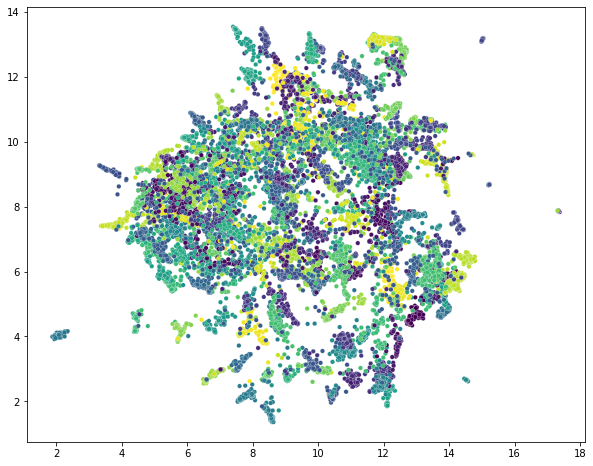

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0],
            embedding[:, 1],
            20,
            y,
            lw=0.2,
            edgecolor='w')

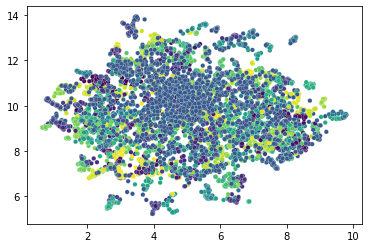

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(embedding[:, 0],
            embedding[:, 1],
            20,
            y,
            lw=0.2,
            edgecolor='w')

In [ ]:
# в UMAP пространстве перебор параметров DBSCAN
E = [0.01, 0.05, 0.1, 0.2, 0.3]
MS = [1, 3, 5, 10, 20]

Q = np.zeros((len(E), len(MS)))
NC =  np.zeros((len(E), len(MS)), dtype=int)

for i, eps in tqdm(enumerate(E)):
  for j, min_samples in enumerate(MS):
    clustering_emb = DBSCAN(eps=eps, min_samples=min_samples).fit(embedding)
    Q[i, j] = v_measure_score(y, clustering_emb.labels_)
    NC[i, j]= len(np.unique(clustering_emb.labels_))


0it [00:00, ?it/s]

In [ ]:
Q

array([[0.69123894, 0.16218877, 0.05979993, 0.00928116, 0.00268133],
       [0.72804759, 0.65563235, 0.59635602, 0.45354344, 0.18861377],
       [0.58364851, 0.56264034, 0.58409492, 0.65505603, 0.55555991],
       [0.24281407, 0.24023148, 0.24971042, 0.32002138, 0.50664112],
       [0.08585398, 0.08582103, 0.08595229, 0.09635836, 0.17067403]])

In [ ]:
Q

array([[0.69465551, 0.04673871, 0.01210369, 0.        , 0.        ],
       [0.67977747, 0.52158394, 0.37132226, 0.12083282, 0.01028597],
       [0.54442754, 0.51510721, 0.55327731, 0.44129514, 0.09757949],
       [0.20379302, 0.20254949, 0.21527507, 0.24459613, 0.45964147],
       [0.08486565, 0.08472772, 0.10266381, 0.10225832, 0.17542603]])

In [ ]:
NC

array([[13151,   314,    63,     6,     2],
       [ 3362,   870,   491,   222,    49],
       [  547,   165,   154,   188,   165],
       [   61,    25,    25,    35,    51],
       [   14,    13,    13,    14,    15]])

In [ ]:
# в исходном пространстве
E = [0.001, 0.002, 0.003, 0.004, 0.005]
MS = [1, 3, 5, 10, 20]

Q = np.zeros((len(E), len(MS)))
NC =  np.zeros((len(E), len(MS)), dtype=int)

for i, eps in tqdm(enumerate(E)):
  for j, min_samples in enumerate(MS):
    clustering_emb = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    Q[i, j] = v_measure_score(y, clustering_emb.labels_)
    NC[i, j]= len(np.unique(clustering_emb.labels_))

0it [00:00, ?it/s]

In [ ]:
Q

array([[0.68451391, 0.        , 0.        , 0.        , 0.        ],
       [0.68451391, 0.        , 0.        , 0.        , 0.        ],
       [0.68451391, 0.        , 0.        , 0.        , 0.        ],
       [0.68451391, 0.        , 0.        , 0.        , 0.        ],
       [0.68451391, 0.        , 0.        , 0.        , 0.        ]])

In [ ]:
NC

array([[15249,     1,     1,     1,     1],
       [15249,     1,     1,     1,     1],
       [15249,     1,     1,     1,     1],
       [15249,     1,     1,     1,     1],
       [15249,     1,     1,     1,     1]])

* перебирать параметры DBSCAN
* перебирать параметры UMAP (м.б. и размерность)
* где варьируется V-мера (почему >1)
* явно поощряет большое число кластеров

In [ ]:
clustering_emb = DBSCAN(eps=0.01, min_samples=1).fit(embedding)
v_measure_score(y, clustering_emb.labels_)

0.6946555095518752

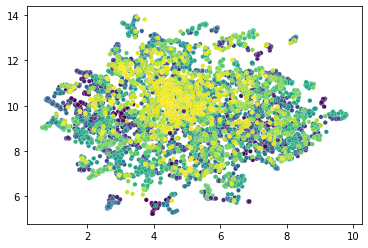

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(embedding[:, 0],
            embedding[:, 1],
            20,
            clustering_emb.labels_,
            lw=0.2,
            edgecolor='w')

In [ ]:
np.unique(clustering_emb.labels_)

array([   0,    1,    2, ..., 5210, 5211, 5212])

# Ищем параметры DBSCAN

In [ ]:
# Эксперименты - пробуем разные параметры UMAP
import umap
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics  import fowlkes_mallows_score
from sklearn.metrics  import adjusted_mutual_info_score
from sklearn.metrics  import adjusted_rand_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.cluster import DBSCAN

n_neighbors=15 #, min_dist=0.1, n_components=2

# параметры
parameters = [5, 15, 30]
E = [0.001, 0.0025, 0.005, 0.01]
MS = [1, 2, 3, 5, 10]

# инициализация
V = np.zeros((len(E), len(MS)))
H = np.zeros((len(E), len(MS)))
C = np.zeros((len(E), len(MS)))
FM = np.zeros((len(E), len(MS)))
MI = np.zeros((len(E), len(MS)))
RS = np.zeros((len(E), len(MS)))
NC =  np.zeros((len(E), len(MS)), dtype=int)

# перебор параметров
for n_neighbors in parameters:
  reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.01, n_components=64)
  embedding = reducer.fit_transform(X)

  for i, eps in enumerate(E):
    for j, min_samples in enumerate(MS):
      clustering_emb = DBSCAN(eps=eps, min_samples=min_samples).fit(embedding)
      a = clustering_emb.labels_
      V[i, j] = v_measure_score(y, a)
      H[i, j] = homogeneity_score(y, a)
      C[i, j] = completeness_score(y, a)
      NC[i, j] = len(np.unique(a))
      FM[i, j] = fowlkes_mallows_score(y, a)
      MI[i, j] = adjusted_mutual_info_score(y, a)
      RS[i, j] = adjusted_rand_score(y, a)

  # вывод статистики
  print(f"n_neighbors = {n_neighbors}")
  print ("V\n", V)
  print ("H\n", H)
  print ("C\n", C)
  print ("FM\n", FM)
  print ("MI\n", MI)
  print ("RS\n", RS)
  print ("NC\n", NC)

n_neighbors = 5
V
 [[0.68541006 0.03654972 0.02250592 0.0129479  0.        ]
 [0.68672668 0.09162344 0.05122521 0.02304769 0.00397308]
 [0.6894285  0.1805375  0.11600625 0.05107117 0.00595837]
 [0.69577743 0.32891671 0.24627135 0.13165676 0.02301714]]
H
 [[0.99970259 0.01892794 0.01148855 0.00654949 0.        ]
 [0.99926528 0.05017656 0.02687198 0.01176408 0.00199304]
 [0.99815571 0.10877386 0.06487206 0.02673353 0.00299358]
 [0.99420654 0.23661272 0.15825368 0.07431045 0.01172868]]
C
 [[0.52146785 0.52965691 0.54876197 0.56127773 1.        ]
 [0.52311335 0.52663406 0.54650944 0.56429928 0.60968648]
 [0.52656362 0.53060367 0.54779714 0.56985562 0.61964946]
 [0.5351442  0.53930125 0.55489119 0.57671505 0.61323494]]
FM
 [[0.02158456 0.08016945 0.08075158 0.0811125  0.08156891]
 [0.03354514 0.07787964 0.07961676 0.08074343 0.0814444 ]
 [0.05135124 0.07368886 0.07698834 0.07969897 0.08138841]
 [0.08350667 0.06470051 0.07063428 0.0766903  0.0808228 ]]
MI
 [[0.00940837 0.0089042  0.00696355 

In [ ]:
from sklearn.cluster import KMeans
clustering_emb = KMeans(n_clusters=151).fit(embedding)

In [ ]:
clustering_emb.labels_

array([ 36,  36,  36, ...,  46,  19, 123], dtype=int32)

## Ищем параметры UMAP: соседи и расстояние

алгоритм k-means

In [ ]:
# Эксперименты - пробуем разные параметры UMAP
import umap
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.cluster import KMeans

n_neighbors=15 #, min_dist=0.1, n_components=2

# параметры
parameters_n_neighbors = [10, 15, 20, 30, 50, 100] # Лучший - 15
parameters_min_dist = [0.01, 0.05, 0.1, 0.2] # Лучщший - 0.01
E = [0.001, 0.0025, 0.005, 0.01]
MS = [1, 3, 5, 10, 20]

# инициализация
V = np.zeros((len(parameters_n_neighbors), len(parameters_min_dist)))
H = np.zeros((len(parameters_n_neighbors), len(parameters_min_dist)))
C = np.zeros((len(parameters_n_neighbors), len(parameters_min_dist)))
NC =  np.zeros((len(parameters_n_neighbors), len(parameters_min_dist)), dtype=int)

for i, n_neighbors in tqdm(enumerate(parameters_n_neighbors)):
  for j, min_dist in enumerate(parameters_min_dist):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=64)
    embedding = reducer.fit_transform(X)
    clustering_emb = KMeans(n_clusters=151).fit(embedding)
    a = clustering_emb.labels_
    V[i, j] = v_measure_score(y, a)
    H[i, j] = homogeneity_score(y, a)
    C[i, j] = completeness_score(y, a)
    NC[i, j]= len(np.unique(a))

# вывод статистики
# print(f"n_neighbors = {n_neighbors}")
print ("V\n", V)
print ("H\n", H)
print ("C\n", C)
print ("NC\n", NC)

0it [00:00, ?it/s]

V
 [[0.73003601 0.7270025  0.72630707 0.72157273]
 [0.73786652 0.73420704 0.73111427 0.72963152]
 [0.736959   0.73395013 0.72795506 0.72107464]
 [0.7259134  0.72242879 0.72094672 0.71439593]
 [0.70928583 0.70662587 0.70023664 0.69464906]
 [0.67518235 0.67205588 0.66587956 0.65959168]]
H
 [[0.7231799  0.71987684 0.72041629 0.71621517]
 [0.73155    0.72863872 0.72611143 0.72545384]
 [0.73025459 0.72860451 0.72308312 0.71620591]
 [0.72070714 0.7173102  0.71678814 0.71059363]
 [0.70347377 0.70244126 0.69592949 0.69104255]
 [0.66935915 0.66680435 0.66140425 0.65576981]]
C
 [[0.73702335 0.73427063 0.73229497 0.72701105]
 [0.74429308 0.73986112 0.73618652 0.7338576 ]
 [0.74378766 0.73937476 0.73289309 0.72601002]
 [0.73119542 0.72762096 0.72515384 0.71823913]
 [0.71519473 0.71086064 0.70459744 0.69829342]
 [0.68110776 0.67739079 0.67041585 0.66345836]]
NC
 [[151 151 151 151]
 [151 151 151 151]
 [151 151 151 151]
 [151 151 151 151]
 [151 151 151 151]
 [151 151 151 151]]


## Ищем размерность и число кластеров

алгоритм k-means

In [ ]:
# параметры
parameters_n_components = [16, 32, 64, 128] # Где-то посередине
parameters_n_clusters = [100, 151, 200] # Чем больше кластеров, тем лучше

# инициализация
V = np.zeros((len(parameters_n_components), len(parameters_n_clusters)))
H = np.zeros((len(parameters_n_components), len(parameters_n_clusters)))
C = np.zeros((len(parameters_n_components), len(parameters_n_clusters)))
NC =  np.zeros((len(parameters_n_components), len(parameters_n_clusters)), dtype=int)

for i, n_components in tqdm(enumerate(parameters_n_components)):
  reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, n_components=n_components)
  embedding = reducer.fit_transform(X)
  for j, n_clusters in enumerate(parameters_n_clusters):
    clustering_emb = KMeans(n_clusters=n_clusters).fit(embedding)
    a = clustering_emb.labels_
    V[i, j] = v_measure_score(y, a)
    H[i, j] = homogeneity_score(y, a)
    C[i, j] = completeness_score(y, a)
    NC[i, j]= len(np.unique(a))

# вывод статистики
# print(f"n_neighbors = {n_neighbors}")
print ("V\n", V)
print ("H\n", H)
print ("C\n", C)
print ("NC\n", NC)

0it [00:00, ?it/s]

V
 [[0.72132955 0.73743797 0.74493427]
 [0.71977268 0.74051205 0.74392715]
 [0.71731167 0.73830079 0.746042  ]
 [0.71865649 0.73815483 0.7457706 ]]
H
 [[0.6856422  0.73137282 0.75837965]
 [0.68161524 0.73510135 0.75771659]
 [0.68090792 0.73189673 0.75908966]
 [0.68118501 0.73156447 0.75941794]]
C
 [[0.7609359  0.74360456 0.73195733]
 [0.76245564 0.746003   0.73063064]
 [0.75782783 0.74481791 0.73343531]
 [0.7604905  0.74486502 0.7326051 ]]
NC
 [[100 151 200]
 [100 151 200]
 [100 151 200]
 [100 151 200]]


# Автокодировщик

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
import torch.nn as nn

enc = nn.Sequential(nn.Linear(768, 700, bias=False),
                    nn.BatchNorm1d(700),
                    nn.ReLU(),
                    nn.Linear(700, 500, bias=False),
                    nn.BatchNorm1d(500),
                    nn.ReLU(),
                    nn.Linear(500, 300, bias=False),
                    nn.BatchNorm1d(300),
                    nn.ReLU(),
                    nn.Linear(300, 100, bias=False),
                    nn.BatchNorm1d(100),
                    nn.ReLU(),
                    nn.Linear(100, 64))

dec = nn.Sequential(nn.Linear(64, 100, bias=False),
                    nn.BatchNorm1d(100),
                    nn.ReLU(),
                    nn.Linear(100, 300, bias=False),
                    nn.BatchNorm1d(300),
                    nn.ReLU(),
                    nn.Linear(300, 500, bias=False),
                    nn.BatchNorm1d(500),
                    nn.ReLU(),
                    nn.Linear(500, 700, bias=False),
                    nn.BatchNorm1d(700),
                    nn.ReLU(),
                    nn.Linear(700, 768))



class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = enc
        self.decoder = dec

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

def get_n_params(model):
    """
    число параметров
    """
    np = 0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

model = Autoencoder().to(device)
criterion = nn.MSELoss()

get_n_params(model)

2155232

In [ ]:
torch.tensor(y).shape

torch.Size([15250])

In [ ]:
import torch.utils.data as data

class MyDataset(data.Dataset):

    def __init__(self, X, y):
        """
        Inputs:
            size - число точек
            std - уровень шума
        """
        super().__init__()
        self.X = torch.tensor(X.astype(np.float32))
        self.y = torch.tensor(y.astype(np.int)) # тут надо тип сменить


    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        # idx-й элемент датасета
        return self.X[idx], self.y[idx]

data_loader = data.DataLoader(MyDataset(X, y), batch_size=1024, shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


In [ ]:
learning_rate = 3e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

num_epochs = 500
losses = []
# do = nn.Dropout()  # comment out for standard AE
for epoch in range(num_epochs):
    total_loss = 0
    i_batch = 0
    for data in data_loader:
        x, _ = data
        x = x.to(device)
        # ===================forward=====================
        output = model(x)
        loss = criterion(output, x)
        total_loss += loss.item()
        i_batch += 1
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    if np.mod(epoch + 1, 100)==0:
      print(f'epoch [{epoch + 1}/{num_epochs}], loss:{total_loss/i_batch:.4f}')
    losses.append(total_loss/i_batch)


# loss:0.0175

epoch [100/500], loss:0.0152
epoch [200/500], loss:0.0155
epoch [300/500], loss:0.0098
epoch [400/500], loss:0.0094
epoch [500/500], loss:0.0103


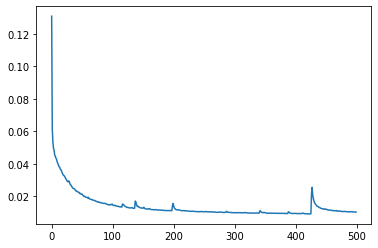

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)

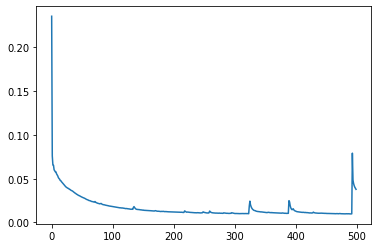

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [ ]:
learning_rate = 1e-4

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

num_epochs = 100
losses = []
# do = nn.Dropout()  # comment out for standard AE
for epoch in range(num_epochs):
    total_loss = 0
    i_batch = 0
    for data in data_loader:
        x, _ = data
        x = x.to(device)
        # ===================forward=====================
        output = model(x)
        loss = criterion(output, x)
        total_loss += loss.item()
        i_batch += 1
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    if np.mod(epoch + 1, 10)==0:
      print(f'epoch [{epoch + 1}/{num_epochs}], loss:{total_loss/i_batch:.4f}')
    losses.append(total_loss/i_batch)



epoch [10/100], loss:0.0198
epoch [20/100], loss:0.0198
epoch [30/100], loss:0.0197
epoch [40/100], loss:0.0197
epoch [50/100], loss:0.0197
epoch [60/100], loss:0.0197
epoch [70/100], loss:0.0197
epoch [80/100], loss:0.0197
epoch [90/100], loss:0.0197
epoch [100/100], loss:0.0197


In [ ]:
((x.abs() > 0.01) + 0.0).mean(), ((output.abs() > 0.01) + 0.0).mean()

(tensor(0.9767, device='cuda:0'), tensor(0.9759, device='cuda:0'))

In [ ]:
z = model.encoder(x)

In [ ]:
((z.abs() > 0.01) + 0.0).mean()

tensor(0.9947, device='cuda:0')

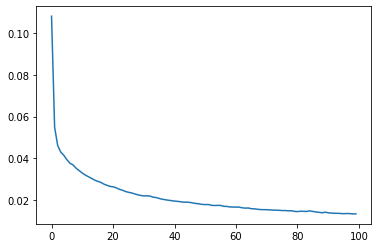

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [ ]:
Z = model.encoder(torch.tensor(X.astype(np.float32)).to(device))

In [ ]:
Z = Z.to('cpu').detach().numpy()

In [ ]:
# просто запуск DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import v_measure_score

clustering = DBSCAN().fit(Z)
print (np.unique(clustering.labels_))

print (f'V={v_measure_score(y, clustering.labels_)}')

[-1]
V=0.0


In [ ]:
import umap
reducer = umap.UMAP(n_neighbors=15, n_components=64, min_dist=0.1)
embedding = reducer.fit_transform(Z)

In [ ]:
clustering = DBSCAN().fit(embedding)
print (np.unique(clustering.labels_))

print (f'V={v_measure_score(y, clustering.labels_)}')

[-1  0  1  2  3  4  5  6  7  8  9 10]
V=0.050821089694211334


In [ ]:
# "умный перебор ??" НЕ РАБОТАЕТ!!!!

# %%
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import make_scorer

def score_func(y_true, y_pred, **kwargs):
    return v_measure_score(y_true, y_pred)
scorer = make_scorer(score_func)


from sklearn.model_selection import GridSearchCV


base_opt = DBSCAN()
grid_search_params = {"min_samples":np.arange(10),
                        "eps":[0.001, 0.01, 0.05, 0.1, 0.2]}

grid_search_cv = GridSearchCV(estimator=base_opt,
                                param_grid=grid_search_params,
                                scoring=scorer)

grid_search_cv.fit(X, y)

GridSearchCV(estimator=DBSCAN(),
             param_grid={'eps': [0.001, 0.01, 0.05, 0.1, 0.2],
                         'min_samples': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring=make_scorer(score_func))

In [ ]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.8972559 , 0.94811902, 0.75881109, 0.61549244, 0.617523  ,
        0.61192832, 0.61926355, 0.61944776, 0.6121037 , 0.60665574,
        0.61789083, 0.63896122, 0.61545715, 0.62140393, 0.62202125,
        0.60895128, 0.61401548, 0.61523528, 0.71359167, 0.60869546,
        0.61945233, 0.63438616, 0.60807204, 0.60719352, 0.61616864,
        0.61635227, 0.61535869, 0.61093593, 0.60999212, 0.61265845,
        0.6197576 , 0.77686715, 0.60534415, 0.61044016, 0.60401821,
        0.60203066, 0.60233264, 0.60543265, 0.5943233 , 0.60627627,
        0.61365867, 0.61656098, 0.58812757, 0.59287815, 0.57725143,
        0.57703819, 0.58473983, 0.57458615, 0.76577506, 0.56030059]),
 'mean_score_time': array([0.00041504, 0.00031843, 0.00024424, 0.00021892, 0.00022063,
        0.00022883, 0.00025711, 0.00022702, 0.00028086, 0.00021005,
        0.00023599, 0.00026927, 0.00022335, 0.00026836, 0.0002388 ,
        0.00021949, 0.00021882, 0.00022535, 0.0002564 , 0.00022316,
        0.

In [ ]:
Counter()

NameError: ignored

In [ ]:
reducer.transform(X).shape

(15250, 2)

In [ ]:
clinc["test"]['intent']

[61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 133,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')